# RATINGS PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("ratings.csv",encoding='latin-1',index_col=0)

In [3]:
df.head()

,Review Title,Ratings,Review Summary
0,Moderate,4,If you can affort few thousands extra you can ...
1,Best in the market!,5,Laptop is amazing and sleek. Good for day-to-d...
2,Mind-blowing purchase,5,I was confused between asus and lenovo s145 la...
3,Simply awesome,5,Got this for 61k. Great value for money. Best ...
4,Value-for-money,4,Laptop is good with good configuration in this...


In [4]:
df.shape

(21128, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21128 entries, 0 to 21127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review Title    21128 non-null  object
 1   Ratings         21049 non-null  object
 2   Review Summary  21128 non-null  object
dtypes: object(3)
memory usage: 660.2+ KB


# EDA

In [6]:
df["Ratings"].unique()

array(['4', '5', 'None', '3', nan], dtype=object)

In [7]:
df.isnull().sum()

Review Title       0
Ratings           79
Review Summary     0
dtype: int64

In [8]:
df.dtypes

Review Title      object
Ratings           object
Review Summary    object
dtype: object

In [9]:
df['Ratings'].mode()[0]

'5'

In [10]:
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mode()[0])

In [11]:
df.isnull().sum()

Review Title      0
Ratings           0
Review Summary    0
dtype: int64

In [12]:
df["Ratings"].unique()

array(['4', '5', 'None', '3'], dtype=object)

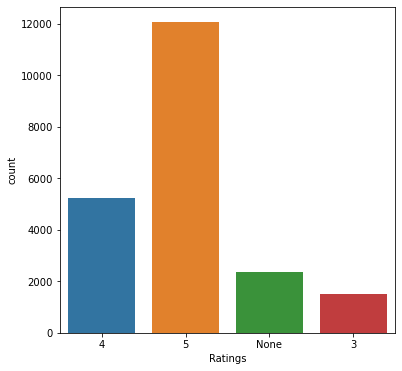

5       12062
4        5221
None     2354
3        1491
Name: Ratings, dtype: int64


In [13]:
plt.figure(figsize=(6,6))
sns.countplot('Ratings',data=df)
plt.show()

print(df['Ratings'].value_counts())

In [14]:
#replacing none with mode 5
df['Ratings'] = df['Ratings'].apply(lambda x: x.replace('None', '5'))

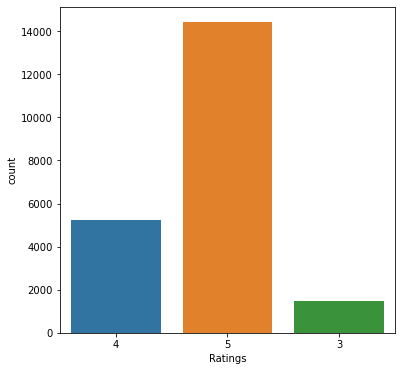

5    14416
4     5221
3     1491
Name: Ratings, dtype: int64


In [15]:
plt.figure(figsize=(6,6))
sns.countplot('Ratings',data=df)
plt.show()

print(df['Ratings'].value_counts())

In [16]:
#dropping the review title column
df.drop(['Review Title'],inplace=True,axis=1)

In [17]:
df.head(5)

,Ratings,Review Summary
0,4,If you can affort few thousands extra you can ...
1,5,Laptop is amazing and sleek. Good for day-to-d...
2,5,I was confused between asus and lenovo s145 la...
3,5,Got this for 61k. Great value for money. Best ...
4,4,Laptop is good with good configuration in this...


In [18]:
#creating two new columns for the length

df['length_summary']=df['Review Summary'].str.len()

In [19]:
df.head()

,Ratings,Review Summary,length_summary
0,4,If you can affort few thousands extra you can ...,510
1,5,Laptop is amazing and sleek. Good for day-to-d...,262
2,5,I was confused between asus and lenovo s145 la...,510
3,5,Got this for 61k. Great value for money. Best ...,509
4,4,Laptop is good with good configuration in this...,148


In [20]:
#converting to lower cases
df['Review Summary']= df['Review Summary'].str.lower()

In [21]:
df.head(5)

,Ratings,Review Summary,length_summary
0,4,if you can affort few thousands extra you can ...,510
1,5,laptop is amazing and sleek. good for day-to-d...,262
2,5,i was confused between asus and lenovo s145 la...,510
3,5,got this for 61k. great value for money. best ...,509
4,4,laptop is good with good configuration in this...,148


In [22]:
#replace email address with'email'
df['Review Summary']=df['Review Summary'].str.replace(r"'^.+@[^\.].*\'.[a-z]{2,}$",'emailaddress')

#replace URLs with web address
df['Review Summary']=df['Review Summary'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                          'webaddress')

#replace moneysymbols with money symb £ is type using alt+156
df['Review Summary']=df['Review Summary'].str.replace(r"£|\$k",'ruppees')

#replace 10 digit phone number with 'phonenumber'
df['Review Summary']=df['Review Summary'].str.replace(r"^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$",
                                         'phonenumber')

#replace numbers with numbers
df['Review Summary']=df['Review Summary'].str.replace(r"\d+(\.\d+)?",'numbr')     

In [23]:
#remove punctuations
df['Review Summary']=df['Review Summary'].str.replace(r"[^\w\d\s]",' ')

#replace white space between terms single space
df['Review Summary']=df['Review Summary'].str.replace(r"\s+",' ')

#remove landing and trailling white space
df['Review Summary']=df['Review Summary'].str.replace(r"^\s+|\s+?$\n\t",' ')

In [24]:
df.head()

,Ratings,Review Summary,length_summary
0,4,if you can affort few thousands extra you can ...,510
1,5,laptop is amazing and sleek good for day to da...,262
2,5,i was confused between asus and lenovo snumbr ...,510
3,5,got this for numbrk great value for money best...,509
4,4,laptop is good with good configuration in this...,148


In [25]:
#removing stop words
from nltk.corpus import stopwords

stop=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure','acnumbr','wi'])


df['Review Summary']=df['Review Summary'].apply(lambda x: ' '.join(
term for term in x.split() if term not in stop))

In [26]:
#length after removing puntuation, stop words
df['cleaned_summary']=df['Review Summary'].str.len()

df.head()

,Ratings,Review Summary,length_summary,cleaned_summary
0,4,affort thousands extra prefer laptops config c...,510,350
1,5,laptop amazing sleek good day day use ssd real...,262,207
2,5,confused asus lenovo snumbr laptop chose go la...,510,397
3,5,got numbrk great value money best infact price...,509,429
4,4,laptop good good configuration price list good...,148,101


In [27]:
#total length removal
print("Original summary length:",df.length_summary.sum())

print("Cleaned Summary length:",df.cleaned_summary.sum())

Original summary length: 4788476
Cleaned Summary length: 3444986


In [28]:
#cahnging datatype
#df['Ratings']=pd.to_numeric(df['Ratings'])

# Vectorization

In [29]:
#tfid=TfidfVectorizer()

vectorizer=TfidfVectorizer()

#features=['Review Summary','Review Title']

#for i in features:
    #df[i]=vectorizer.fit_transform(df[i])

In [30]:
x=vectorizer.fit_transform(df['Review Summary'])

y=df['Ratings']

In [31]:
print("bag of words=",vectorizer.get_feature_names())

bag of words= ['able', 'absolute', 'absolutely', 'ac', 'accept', 'accesories', 'access', 'accessionâ', 'accessories', 'accommodate', 'according', 'accordingly', 'accuracy', 'accurate', 'acer', 'achieve', 'act', 'action', 'activities', 'actually', 'adaptor', 'add', 'adding', 'adds', 'adequate', 'adjust', 'adjustment', 'adjustments', 'adsl', 'advanced', 'advantage', 'advertised', 'aesthitically', 'affordable', 'affort', 'afterall', 'afterwards', 'ahead', 'ai', 'air', 'airtel', 'alexa', 'alliance', 'allð', 'almoded', 'almost', 'along', 'alot', 'already', 'also', 'always', 'amazing', 'amazon', 'amd', 'amex', 'amoled', 'amount', 'android', 'angle', 'anglenumbr', 'angles', 'announcement', 'annoyed', 'another', 'antenna', 'antennas', 'anumbr', 'anyone', 'anything', 'anywhere', 'ap', 'apart', 'apartment', 'apex', 'app', 'appearance', 'apple', 'applicable', 'application', 'applications', 'appreciated', 'appreciation', 'apps', 'aps', 'apxx', 'archer', 'area', 'aroma', 'around', 'arounnumbr', 'ar

In [32]:
x.shape

(21128, 1928)

In [33]:
y.shape

(21128,)

In [34]:
y.dtypes

dtype('O')

In [35]:
x.dtype

dtype('float64')

# Model Building

In [36]:
MNB=MultinomialNB()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

MNB.fit(x_train,y_train)

predgn=MNB.predict(x_test)

print("Report=",classification_report(y_test,predgn))

print("accuracy=", accuracy_score(y_test,predgn))


Report=               precision    recall  f1-score   support

           3       0.97      0.68      0.80       365
           4       1.00      0.91      0.95      1322
           5       0.94      1.00      0.97      3595

    accuracy                           0.95      5282
   macro avg       0.97      0.86      0.91      5282
weighted avg       0.96      0.95      0.95      5282

accuracy= 0.9547519878833776


In [37]:
#linear Svc
ls=LinearSVC()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

ls.fit(x_train,y_train)

predls=ls.predict(x_test)

print("Report=",classification_report(y_test,predls))

print("accuracy=", accuracy_score(y_test,predls))

Report=               precision    recall  f1-score   support

           3       0.90      0.98      0.94       365
           4       0.99      0.97      0.98      1322
           5       1.00      0.99      1.00      3595

    accuracy                           0.99      5282
   macro avg       0.96      0.98      0.97      5282
weighted avg       0.99      0.99      0.99      5282

accuracy= 0.9869367663763726


In [38]:
#random forest
rfc=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

rfc.fit(x_train,y_train)

predrf=rfc.predict(x_test)

print("Report=",classification_report(y_test,predrf))

print("accuracy=", accuracy_score(y_test,predrf))

Report=               precision    recall  f1-score   support

           3       0.90      0.98      0.94       365
           4       0.99      0.98      0.99      1322
           5       1.00      1.00      1.00      3595

    accuracy                           0.99      5282
   macro avg       0.96      0.98      0.97      5282
weighted avg       0.99      0.99      0.99      5282

accuracy= 0.9901552442256721


# Cross Validation Score

In [39]:
print("CV score and it's mean of MultinomialNB:",cross_val_score(MNB,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predgn))
print("CV score and it's mean of LinearSVC:",cross_val_score(ls,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predls))
print("CV score and it's mean of Random Forest:",cross_val_score(rfc,x,y,cv=6).mean(),"Accuracy Score:",accuracy_score(y_test,predrf))

CV score and it's mean of MultinomialNB: 0.8740975229717395 Accuracy Score: 0.9547519878833776
CV score and it's mean of LinearSVC: 0.9112500035615517 Accuracy Score: 0.9869367663763726
CV score and it's mean of Random Forest: 0.9119126806452598 Accuracy Score: 0.9901552442256721


Selecting random forest as my final model beacuse it have least difference in cv and accuracy score

# Hyper Parameter Tuning

In [40]:
parameters={'min_samples_split':np.arange(10,15),'n_estimators':np.arange(120,135),'criterion':['gini','entropy'],
          'max_depth':np.arange(20,32)}

In [41]:
gsv=GridSearchCV(rfc,parameters,cv=6)

In [42]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134])})

In [43]:
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 31,
 'min_samples_split': 13,
 'n_estimators': 128}

best parameters

# Final model

In [45]:
best=RandomForestClassifier(criterion='entropy',max_depth=31,min_samples_split=13,n_estimators=128)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

98.33396440742142


In [46]:
#model saving
import joblib as jb
jb.dump(best,"rating.pkl")

['rating.pkl']

# Conclusion

In [47]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
RATING=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
RATING

,Original,Predicted
0,5,5
1,5,5
2,5,5
3,4,4
4,5,5
...,...,...
5277,5,5
5278,5,5
5279,4,4
5280,5,5
